### Create the dataset while specifying the data directory and wrapper functions for data cleaning and preprocessing

In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
only_letters= r'[^A-Za-z0-9\s]+'

def text_preprocess(sent):
    sent=sent.lower().strip()
    sent=re.sub(only_letters,'',sent)
    sent=re.sub("\s\s+" , " ", sent)
    return sent
    

data_dir='topicclass/'
train_file='topicclass_train.txt'
val_file='topicclass_valid.txt'
test_file='topicclass_test.txt'

def create_data(file_name):
    fp= open(file_name)
    data={'Sentence':[], 'Label':[]}
    for line in fp:
        try:
            line=line.strip().split('|||')
            sent= text_preprocess(line[1]).strip()
            label=line[0].strip()
            data['Sentence'].append(sent)
            data['Label'].append(label)
        except Exception as e:
            print(e)
    
    df= pd.DataFrame(data)
    return df

train_df= create_data(data_dir+train_file)
val_df= create_data(data_dir+val_file)

## Create a distribution of the train and dev labels

Total number of training sentences =  253909
Total number of validation sentences =  643


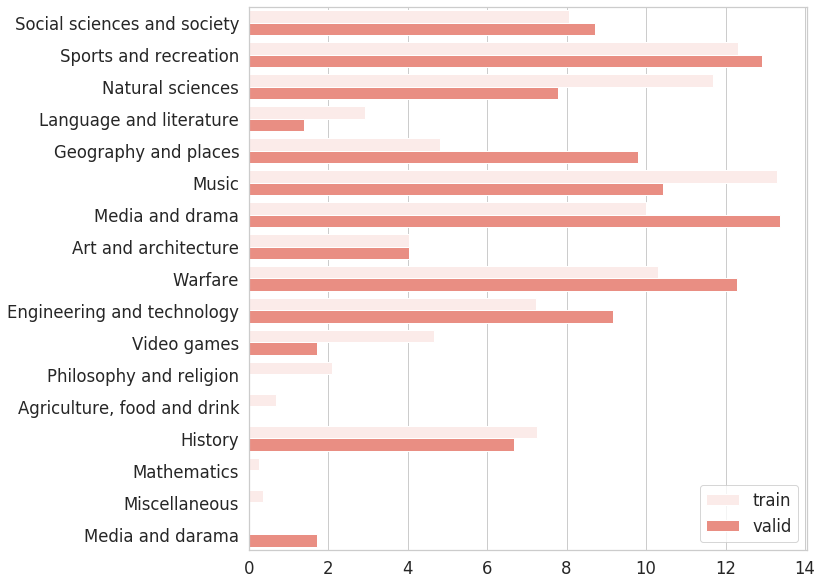

In [7]:
print("Total number of training sentences = ", len(train_df))
print("Total number of validation sentences = ",len(val_df))

# Simple function to create distributions of data over diff features
def create_dists(df,label):
    label_dict={}
    labels=list(df[label])
    count=len(df[label])
    for elem in labels:
        if elem not in label_dict:
            label_dict[elem]=0
        label_dict[elem]+=1    
        
    for elem in label_dict:
        label_dict[elem]=100*label_dict[elem]/count
    return label_dict

train_labels= create_dists(train_df,'Label')
val_labels= create_dists(val_df,'Label')

label_df={}
label_df['Label']=[]
label_df['Type']=[]
label_df['Percentage']=[]

for elem in train_labels:
    label_df['Label'].append(elem)
    label_df['Percentage'].append(train_labels[elem])
    label_df['Type'].append('train')
    if elem not in val_labels:
        label_df['Label'].append(elem)
        label_df['Percentage'].append(0)
        label_df['Type'].append('valid')

for elem in val_labels:
    label_df['Label'].append(elem)
    label_df['Percentage'].append(val_labels[elem])
    label_df['Type'].append('valid')
    if elem not in train_labels:
        label_df['Label'].append(elem)
        label_df['Percentage'].append(0)
        label_df['Type'].append('train')

sns.set(font_scale=1.5) 
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.barplot(x='Percentage',y='Label',hue='Type', data=label_df,color="salmon")

In [11]:
word_to_idx={}
label_to_idx={}
word_to_idx['UNK']=0
word_count=1

train_sents= list(train_df['Sentence'])
for sent in train_sents:
    words= sent.split()
    for word in words:
        if word not in word_to_idx:
            word_to_idx[word]=word_count
            word_count+=1

valid_sents= list(val_df['Sentence'])
for sent in valid_sents:
    words= sent.split()
    for word in words:
        if word not in word_to_idx:
            word_to_idx[word]=word_count
            word_count+=1

print("Vocabulary size = ", len(word_to_idx))

labels= set(train_df['Label'])|set(val_df['Label'])
for label in labels:
    label_to_idx[label]=len(label_to_idx)
print("Number of labels =", len(label_to_idx))

Vocabulary size =  114910
Number of labels = 17


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

if torch.cuda.is_available():
torch.manual_seed(11747)



